In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from hmmlearn import hmm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
import functions_data_processing as fsd
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from itertools import combinations
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import TimeSeriesSplit
import random
from sklearn.model_selection import StratifiedKFold

In [2]:
df_imported = pd.read_csv("df.csv", index_col=0)
df_imported = df_imported
df_imported.index = pd.to_datetime(df_imported.index)
df = pd.DataFrame()
df["Microwave"] = df_imported["Microwave"]
df["Default"] = df_imported["Default"]
df["Ground Truth"] = df_imported["Ground Truth"]
df["Microwave - Default (combined)"] = "temporary"
df["Garage door"] = df_imported["Garage door"]

df = df.mask(df == 0.9, 1)
df = df.mask(df == 0.1, 0)

mask1 = (df["Microwave"] == 1.0) & (df["Default"] == 1.0)
mask2 = (df["Microwave"] == 0.0) & (df["Default"] == 1.0)
mask3 = (df["Microwave"] == 0.0) & (df["Default"] == 0.0)
mask4 = (df["Microwave"] == 1.0) & (df["Default"] == 0.0)

df["Microwave - Default (combined)"] = ""
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask1, "11"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask2, "01"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask3, "00"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask4, "10"
)

df["Ground Truth"] = df["Ground Truth"].astype(int)
df.iloc[8620:10080]

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door
2016-01-07 04:40:00,0.0,1.0,1,01,0.0
2016-01-07 04:41:00,0.0,1.0,1,01,0.0
2016-01-07 04:42:00,0.0,1.0,1,01,0.0
2016-01-07 04:43:00,0.0,1.0,1,01,0.0
2016-01-07 04:44:00,0.0,1.0,1,01,0.0
...,...,...,...,...,...
2016-01-08 04:55:00,0.0,1.0,1,01,0.0
2016-01-08 04:56:00,0.0,1.0,1,01,0.0
2016-01-08 04:57:00,0.0,1.0,1,01,0.0
2016-01-08 04:58:00,0.0,1.0,1,01,0.0


In [3]:
df.head()

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door
2016-01-01 05:00:00,0.0,1.0,1,01,0.0
2016-01-01 05:01:00,0.0,1.0,1,01,0.0
2016-01-01 05:02:00,0.0,1.0,1,01,0.0
2016-01-01 05:03:00,0.0,1.0,1,01,0.0
2016-01-01 05:04:00,0.0,1.0,1,01,0.0


In [4]:
print(df.index[0])
print(datetime.datetime(year=2016, month=1, day=1, hour=4))
delta = (df.index[0] - datetime.datetime(year=2016, month=1, day=1, hour=4))
print(delta.components)



2016-01-01 05:00:00
2016-01-01 04:00:00
Components(days=0, hours=1, minutes=0, seconds=0, milliseconds=0, microseconds=0, nanoseconds=0)


In [5]:
df.loc["2016-01-26 23:55:00"]

Microwave                         0.0
Default                           1.0
Ground Truth                        1
Microwave - Default (combined)     01
Garage door                       0.0
Name: 2016-01-26 23:55:00, dtype: object

In [6]:
counter_0 = 0
counter_1 = 1
for i in df["Microwave"]:
    if i == 0.0:
        counter_0 = counter_0 + 1
    if i == 1.0:
        counter_1 = counter_1 + 1

print("Counter for 0: ", counter_0)
print("Counter for 1: ", counter_1)

Counter for 0:  499942
Counter for 1:  3969


In [7]:
df=df.iloc[:10080]

In [8]:
df["Microwave-State"] = ''

In [9]:
df.iloc[:20]

,Microwave,Default,Ground Truth,Microwave - Default (combined),Garage door,Microwave-State
2016-01-01 05:00:00,0.0,1.0,1,01,0.0,
2016-01-01 05:01:00,0.0,1.0,1,01,0.0,
2016-01-01 05:02:00,0.0,1.0,1,01,0.0,
2016-01-01 05:03:00,0.0,1.0,1,01,0.0,
2016-01-01 05:04:00,0.0,1.0,1,01,0.0,
2016-01-01 05:05:00,0.0,1.0,1,01,0.0,
2016-01-01 05:06:00,0.0,1.0,1,01,0.0,
2016-01-01 05:07:00,0.0,1.0,1,01,0.0,
2016-01-01 05:08:00,0.0,1.0,1,01,0.0,
2016-01-01 05:09:00,0.0,1.0,1,01,0.0,


In [10]:
def class_imbalance(feature):

    lag = datetime.timedelta(minutes=35)
    event_len = datetime.timedelta(minutes=35)

    counter=0
    while counter < len(df.index):
        i = df.index[counter]
        state = []
        state_after = []

        if i + event_len - datetime.timedelta(minutes=1) >= df.index[-1]:
            break
        if i + lag - datetime.timedelta(minutes=1) >= df.index[-1]:
            break
        for j in pd.date_range(
            start=i, end=i + event_len - datetime.timedelta(minutes=1), freq="min"
        ).tolist():
            if (
                df.loc[j, feature] == 0.0
                and df.loc[j + datetime.timedelta(minutes=1), feature] == 0.0
            ):
                state.append("d")
            if (
                df.loc[j, feature] == 1.0
                and df.loc[j + datetime.timedelta(minutes=1), feature] == 1.0
            ):
                state.append("up")
            if (
                df.loc[j, feature] == 0.0
                and df.loc[j + datetime.timedelta(minutes=1), feature] == 1.0
            ):
                state.append("d_up")
            if (
                df.loc[j, feature] == 1.0
                and df.loc[j + datetime.timedelta(minutes=1), feature] == 0.0
            ):
                state.append("up_d")

        if 'up_d' in state:
            for j in pd.date_range(
            start=i, end=i + event_len - datetime.timedelta(minutes=1), freq="min"
        ).tolist():
                df.loc[j, feature] = 1.0

        for j in pd.date_range(
            start=i, end=i + event_len - datetime.timedelta(minutes=1), freq="min"
        ).tolist():
            if (
                df.loc[j, feature] == 0.0
                and df.loc[j + datetime.timedelta(minutes=1), feature] == 0.0
            ):
                state_after.append("d")
            if (
                df.loc[j, feature] == 1.0
                and df.loc[j + datetime.timedelta(minutes=1), feature] == 1.0
            ):
                state_after.append("up")
            if (
                df.loc[j, feature] == 0.0
                and df.loc[j + datetime.timedelta(minutes=1), feature] == 1.0
            ):
                state_after.append("d_up")
            if (
                df.loc[j, feature] == 1.0
                and df.loc[j + datetime.timedelta(minutes=1), feature] == 0.0
            ):
                state_after.append("up_d")

        #print("Before \n", state)
        #print("After \n", state_after)
        i += lag
        counter = df.index.get_loc(i)

In [11]:
class_imbalance(feature = "Microwave")
class_imbalance(feature="Default")


In [12]:
mask1 = (df["Microwave"] == 1.0) & (df["Default"] == 1.0)
mask2 = (df["Microwave"] == 0.0) & (df["Default"] == 1.0)
mask3 = (df["Microwave"] == 0.0) & (df["Default"] == 0.0)
mask4 = (df["Microwave"] == 1.0) & (df["Default"] == 0.0)

df["Microwave - Default (combined)"] = ""
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask1, "11"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask2, "01"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask3, "00"
)
df["Microwave - Default (combined)"] = df["Microwave - Default (combined)"].mask(
    mask4, "10"
)

In [13]:
datelist = pd.date_range(
    start = datetime.datetime(year=2016, month=1, day=1, hour=4), freq='min',
    end = datetime.datetime(year=2016, month=1, day=1, hour=4, minute=6),
 
).tolist()
print(datelist)

[Timestamp('2016-01-01 04:00:00', freq='T'), Timestamp('2016-01-01 04:01:00', freq='T'), Timestamp('2016-01-01 04:02:00', freq='T'), Timestamp('2016-01-01 04:03:00', freq='T'), Timestamp('2016-01-01 04:04:00', freq='T'), Timestamp('2016-01-01 04:05:00', freq='T'), Timestamp('2016-01-01 04:06:00', freq='T')]


In [14]:
counter_0 = 0
counter_1 = 0
for i in df['Microwave']:
    if i==0.0:
        counter_0 = counter_0 + 1
    if i == 1.0:
        counter_1 = counter_1 + 1

print("Counter for 0: ", counter_0)
print("Counter for 1: ", counter_1)

Counter for 0:  9129
Counter for 1:  951


In [15]:
counter_0 = 0
counter_1 = 1
for i in df["Default"]:
    if i == 0.0:
        counter_0 = counter_0 + 1
    if i == 1.0:
        counter_1 = counter_1 + 1

print("Counter for 0: ", counter_0)
print("Counter for 1: ", counter_1)

Counter for 0:  4515
Counter for 1:  5566


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Split: 0
X train:  [560, 150, 80, 130]
Y train:  [440, 440]
X test:  [261, 585, 0, 70]
Y test:  [820, 820]
Treshold  [2 1 0]
[[ 15  81]
 [640 180]]
Learned emission probs:
[[1.29931670e-14 4.16666667e-01 2.22222222e-01 3.61111111e-01]
 [1.00000000e+00 1.56920618e-12 2.16257582e-10 4.79191321e-16]]
Learned transition matrix:
[[0.99164345 0.00835655]
 [0.00535714 0.99464286]]
------------------------------------
Split: 1
X train:  [821, 735, 80, 200]
Y train:  [1260, 1260]
X test:  [349, 462, 35, 70]
Y test:  [532, 532]
Treshold  [2 1 0]
[[ 36 348]
 [532   0]]
Learned emission probs:
[[4.29130204e-21 7.24137931e-01 7.88177340e-02 1.97044335e-01]
 [1.00000000e+00 1.07064233e-19 3.55515997e-14 4.67930256e-30]]
Learned transition matrix:
[[0.99605911 0.00394089]
 [0.00365854 0.99634146]]
------------------------------------
Split: 2
X train:  [1170, 1197, 115, 270]
Y train:  [1792, 1792]
X test:  [580, 266, 70, 0]
Y test:  [436, 436]
Treshold  [2 1 0]
[[ 80 400]
 [256 180]]
Learned emission

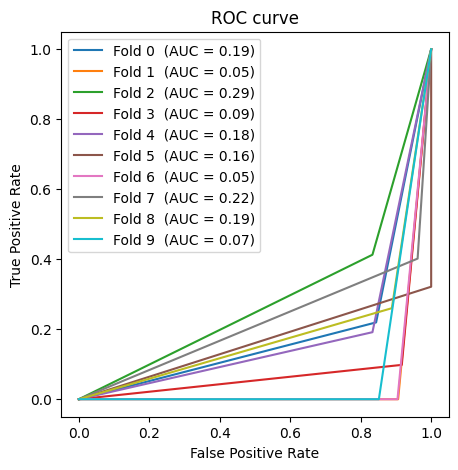

In [16]:
y_true_original = df["Ground Truth"]

ss = TimeSeriesSplit(n_splits=10)

y_true_all = []


def sequence2counts(status, ostates2id):
    ans = []
    for word, idx in ostates2id.items():

        count = status.count(word)
        ans.append(count)
    return ans


# Smart home situation states: hidden state
h_states = ["absent", "present"]  # not at home, at home
id2hstates = dict(zip(range(len(h_states)), h_states))  # Dict from numbers to words

# Initial distribution of hidden states
start_probs = np.array([0.4, 0.6])

# microwave and GT: observable states:
# Pos 1: Default $Df$
# Pos 2: Microvave on off
o_states = ["00", "01", "10", "11"]
id2ostates = dict(zip(o_states, range(len(o_states))))

# Transition probs from hidden to observable states
emission_probs = np.array([[3.00000208759412e-11, 8.51977402e-01, 4.83992459e-02, 9.962335207e-02],[9.99999450e-01, 2.62120253e-07, 4.50510504e-08, 2.43263438e-07]])

# Transition matrix of hidden states
trans_mat = np.array([[0.5, 0.5], [0.5, 0.5]])

observations = df["Microwave - Default (combined)"].values.tolist()


# Format observations
X = []
for status in observations:
    row = sequence2counts(status, id2ostates)
    X.append(row)
data = np.array(X, dtype=int)


n_trials = len(observations[0])


# Build the model
# Set up model:
model_2 = hmm.MultinomialHMM(
    n_components=len(h_states), n_trials=n_trials - 1, init_params="", params='ste'
)


model_2.n_features = len(o_states)


model_2.startprob_ = start_probs
model_2.transmat_ = trans_mat
model_2.emissionprob_ = emission_probs

x = data
y = y_true_original.to_numpy()

fig, ax = plt.subplots(figsize=(5, 5))


for split_number, (train_index, test_index) in enumerate(ss.split(x, y)):

    print("Split:", split_number)

    # print("Start: ", model.startprob_, "Transmission: ", model.transmat_, "Emission :", model.emissionprob_)

    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # print("Train:", train_index)
    # print("Test", test_index)

    X_train = X_train.astype(int)

    counter_Xtrain = [0, 0, 0, 0]
    for i in X_train:
        if i[0] == 1:
            counter_Xtrain[0] = counter_Xtrain[0] + 1
        if i[1] == 1:
            counter_Xtrain[1] = counter_Xtrain[1] + 1
        if i[2] == 1:
            counter_Xtrain[2] = counter_Xtrain[2] + 1
        if i[3] == 1:
            counter_Xtrain[3] = counter_Xtrain[3] + 1

    print("X train: ", counter_Xtrain)

    counter_ytrain = [0, 0]
    for i in y_train:
        if i == 1:
            counter_ytrain[0] = counter_ytrain[0] + 1
        if i == 1:
            counter_ytrain[1] = counter_ytrain[1] + 1

    print("Y train: ", counter_ytrain)

    counter_Xtest = [0, 0, 0, 0]
    for i in X_test:
        if i[0] == 1:
            counter_Xtest[0] = counter_Xtest[0] + 1
        if i[1] == 1:
            counter_Xtest[1] = counter_Xtest[1] + 1
        if i[2] == 1:
            counter_Xtest[2] = counter_Xtest[2] + 1
        if i[3] == 1:
            counter_Xtest[3] = counter_Xtest[3] + 1

    print("X test: ", counter_Xtest)

    counter_ytest = [0, 0]
    for i in y_test:
        if i == 1:
            counter_ytest[0] = counter_ytest[0] + 1
        if i == 1:
            counter_ytest[1] = counter_ytest[1] + 1

    print("Y test: ", counter_ytest)

    # Fit the model and predict probabilities for the test set
    model_2.fit(X_train)
    logprob, state_ests = model_2.decode(X_test)

    y_pred_proba = state_ests

    fpr, tpr, treshold = roc_curve(y_test, y_pred_proba)
    print("Treshold ", treshold)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    print(confusion_matrix(y[test_index], y_pred_proba))

    # Plot the ROC curve for the current fold
    ax.plot(
        fpr, tpr, label="Fold {}  (AUC = {})".format(split_number, round(auc_score, 2))
    )

    print("Learned emission probs:")
    print(model_2.emissionprob_)

    print("Learned transition matrix:")
    print(model_2.transmat_)
    print("------------------------------------")

# Plot the ROC curve
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

In [17]:
y_true_original = df["Ground Truth"]

scores = []
emissions = []

# Initial distribution of hidden states
start_probs = np.array([0.4, 0.6])

# Normalize start_probs to ensure that its values sum to 1
start_probs /= np.sum(start_probs)

for e1 in np.arange(0.05,0.5,0.05):
    for e2 in np.arange(0.05,0.5-e1,0.05):
        for e3 in np.arange(0.05,0.5,0.05):
            for e4 in np.arange(0.05,0.5-e3,0.05):
          

                        ss = TimeSeriesSplit(n_splits=10)

                        y_true_all = []

                        def sequence2counts(status, ostates2id):
                            ans = []
                            for word, idx in ostates2id.items():

                                count = status.count(word)
                                ans.append(count)
                            return ans

                        # Smart home situation states: hidden state
                        h_states = ["absent", "present"]  # not at home, at home
                        id2hstates = dict(zip(range(len(h_states)), h_states))  # Dict from numbers to words

                        # Initial distribution of hidden states

                        # Set the number of features
                        model_2.n_features = len(o_states)

                        # Set the initial state probabilities
                        model_2.startprob_ = start_probs

                        # microwave and GT: observable states:
                        # Pos 1: Default $Df$
                        # Pos 2: Microvave on off
                        o_states = ["00", "01", "10", "11"]
                        id2ostates = dict(zip(o_states, range(len(o_states))))

                        # Transition probs from hidden to observable states
                        emission_probs = np.array(
                            [
                                [e1, e2,  0.25, 1-e1-e2],
                                [e3, e4, 0.25, 1- e3 - e4],
                            ]
                        )

                        # Transition matrix of hidden states
                        trans_mat = np.array([[0.5, 0.5], [0.5, 0.5]])

                        observations = df["Microwave - Default (combined)"].values.tolist()

                        # Format observations
                        X = []
                        for status in observations:
                            row = sequence2counts(status, id2ostates)
                            X.append(row)
                        data = np.array(X, dtype=int)

                        n_trials = len(observations[0])

                        # Build the model
                        # Set up model:
                        model_2 = hmm.MultinomialHMM(
                            n_components=len(h_states), n_trials=n_trials - 1, init_params="", params="ste"
                        )

                        model_2.n_features = len(o_states)

                        model_2.startprob_ = start_probs
                        model_2.transmat_ = trans_mat
                        model_2.emissionprob_ = emission_probs

                        x = data
                        y = y_true_original.to_numpy()

                        # fig, ax = plt.subplots(figsize=(5, 5))

                        auc_split = []
                        for split_number, (train_index, test_index) in enumerate(ss.split(x, y)):

                            # print("Split:", split_number)

                            # print("Start: ", model.startprob_, "Transmission: ", model.transmat_, "Emission :", model.emissionprob_)

                            X_train, X_test = x[train_index], x[test_index]
                            y_train, y_test = y[train_index], y[test_index]

                            # print("Train:", train_index)
                            # print("Test", test_index)

                            X_train = X_train.astype(int)

                            counter_Xtrain = [0, 0, 0, 0]
                            for i in X_train:
                                if i[0] == 1:
                                    counter_Xtrain[0] = counter_Xtrain[0] + 1
                                if i[1] == 1:
                                    counter_Xtrain[1] = counter_Xtrain[1] + 1
                                if i[2] == 1:
                                    counter_Xtrain[2] = counter_Xtrain[2] + 1
                                if i[3] == 1:
                                    counter_Xtrain[3] = counter_Xtrain[3] + 1

                            # print("X train: ", counter_Xtrain)

                            counter_ytrain = [0, 0]
                            for i in y_train:
                                if i == 1:
                                    counter_ytrain[0] = counter_ytrain[0] + 1
                                if i == 1:
                                    counter_ytrain[1] = counter_ytrain[1] + 1

                            # print("Y train: ", counter_ytrain)

                            counter_Xtest = [0, 0, 0, 0]
                            for i in X_test:
                                if i[0] == 1:
                                    counter_Xtest[0] = counter_Xtest[0] + 1
                                if i[1] == 1:
                                    counter_Xtest[1] = counter_Xtest[1] + 1
                                if i[2] == 1:
                                    counter_Xtest[2] = counter_Xtest[2] + 1
                                if i[3] == 1:
                                    counter_Xtest[3] = counter_Xtest[3] + 1

                            # print("X test: ", counter_Xtest)

                            counter_ytest = [0, 0]
                            for i in y_test:
                                if i == 1:
                                    counter_ytest[0] = counter_ytest[0] + 1
                                if i == 1:
                                    counter_ytest[1] = counter_ytest[1] + 1

                            # print("Y test: ", counter_ytest)

                            # print(model_2.startprob_)

                            # Fit the model and predict probabilities for the test set
                            model_2.fit(X_train)
                            logprob, state_ests = model_2.decode(X_test)

                            y_pred_proba = state_ests

                            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                            auc_score = roc_auc_score(y_test, y_pred_proba)

                            auc_split.append(auc_score)

                            # print(confusion_matrix(y[test_index], y_pred_proba))

                            # Plot the ROC curve for the current fold
                            # ax.plot(fpr, tpr, label="Fold {}  (AUC = {})".format(split_number, round(auc_score, 2)))
                            """
                            print("Learned emission probs:")
                            print(model_2.emissionprob_)

                            print("Learned transition matrix:")
                            print(model_2.transmat_)
                            print("------------------------------------")

                            """

                        scores.append(auc_split)
                        emissions.append(emission_probs)

                        """
                        # Plot the ROC curve
                        plt.xlabel("False Positive Rate")
                        plt.ylabel("True Positive Rate")
                        plt.title("ROC curve")
                        plt.legend()
                        plt.show()

                        """

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows

KeyboardInterrupt: 

In [ ]:
for i in range(len(scores)):
    if (np.median(scores[i]) > 0.8) & (np.std(scores[i]) < 0.067):
        print(i)
        print("Mean ", np.mean(scores[i]), "Median ", np.median(scores[i]), "Min ", np.min(scores[i]), "Std ", np.std(scores[i]))

1061
Mean  0.8174080160876075 Median  0.8183452767646835 Min  0.7090978593272171 Std  0.06558544366237083


In [ ]:
print(emissions[1061])

[[0.25 0.15 0.25 0.6 ]
 [0.2  0.25 0.25 0.55]]


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_param

Split: 0
X train:  [0.60869565 0.16304348 0.08695652 0.14130435]
Y train:  [0.5 0.5]
X test:  [0.2849345  0.63864629 0.         0.07641921]
Y test:  [0.5 0.5]
[[ 81  15]
 [250 570]]
Learned emission probs:
[[0.25 0.15 0.25 0.6 ]
 [0.2  0.25 0.25 0.55]]
Learned transition matrix:
[[0.5 0.5]
 [0.5 0.5]]
------------------------------------
Split: 1
X train:  [0.44716776 0.4003268  0.04357298 0.10893246]
Y train:  [0.5 0.5]
X test:  [0.38100437 0.50436681 0.03820961 0.07641921]
Y test:  [0.5 0.5]
[[348  36]
 [ 70 462]]
Learned emission probs:
[[0.25 0.15 0.25 0.6 ]
 [0.2  0.25 0.25 0.55]]
Learned transition matrix:
[[0.5 0.5]
 [0.5 0.5]]
------------------------------------
Split: 2
X train:  [0.42514535 0.4349564  0.04178779 0.09811047]
Y train:  [0.5 0.5]
X test:  [0.63318777 0.29039301 0.07641921 0.        ]
Y test:  [0.5 0.5]
[[400  80]
 [180 256]]
Learned emission probs:
[[0.25 0.15 0.25 0.6 ]
 [0.2  0.25 0.25 0.55]]
Learned transition matrix:
[[0.5 0.5]
 [0.5 0.5]]
-----------------

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'


X train:  [0.43692711 0.47097337 0.02782628 0.06427324]
Y train:  [0.5 0.5]
X test:  [0.23908297 0.6441048  0.04039301 0.07641921]
Y test:  [0.5 0.5]
[[219  37]
 [ 70 590]]
Learned emission probs:
[[0.25 0.15 0.25 0.6 ]
 [0.2  0.25 0.25 0.55]]
Learned transition matrix:
[[0.5 0.5]
 [0.5 0.5]]
------------------------------------


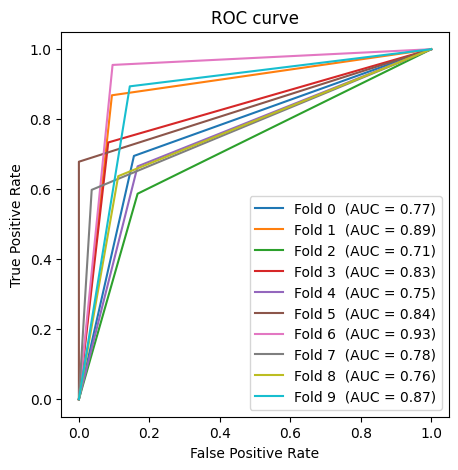

In [ ]:
ss = TimeSeriesSplit(n_splits=10)

y_true_all = []

def sequence2counts(status, ostates2id):
    ans = []
    for word, idx in ostates2id.items():

        count = status.count(word)
        ans.append(count)
    return ans

# Smart home situation states: hidden state
h_states = ["absent", "present"]  # not at home, at home
id2hstates = dict(zip(range(len(h_states)), h_states))  # Dict from numbers to words

# Initial distribution of hidden states

start_probs = np.array([0.4, 0.6])
# Set the number of features
model_2.n_features = len(o_states)

# Set the initial state probabilities
model_2.startprob_ = start_probs

# microwave and GT: observable states:
# Pos 1: Default $Df$
# Pos 2: Microvave on off
o_states = ["00", "01", "10", "11"]
id2ostates = dict(zip(o_states, range(len(o_states))))

# Transition probs from hidden to observable states
emission_probs = np.array(
    [
        [0.25, 0.15, 0.25, 0.6 ],[0.2,  0.25, 0.25, 0.55]]
)

# Transition matrix of hidden states
trans_mat = np.array([[0.5, 0.5], [0.5, 0.5]])

observations = df["Microwave - Default (combined)"].values.tolist()

# Format observations
X = []
for status in observations:
    row = sequence2counts(status, id2ostates)
    X.append(row)
data = np.array(X, dtype=int)

n_trials = len(observations[0])

# Build the model
# Set up model:
model_2 = hmm.MultinomialHMM(
    n_components=len(h_states), n_trials=n_trials - 1, init_params="s", params=""
)

model_2.n_features = len(o_states)

model_2.startprob_ = start_probs
model_2.transmat_ = trans_mat
model_2.emissionprob_ = emission_probs

x = data
y = y_true_original.to_numpy()

fig, ax = plt.subplots(figsize=(5, 5))

auc_split = []
for split_number, (train_index, test_index) in enumerate(ss.split(x, y)):

    print("Split:", split_number)

    # print("Start: ", model.startprob_, "Transmission: ", model.transmat_, "Emission :", model.emissionprob_)

    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # print("Train:", train_index)
    # print("Test", test_index)

    X_train = X_train.astype(int)

    counter_Xtrain = [0, 0, 0, 0]
    for i in X_train:
        if i[0] == 1:
            counter_Xtrain[0] = counter_Xtrain[0] + 1
        if i[1] == 1:
            counter_Xtrain[1] = counter_Xtrain[1] + 1
        if i[2] == 1:
            counter_Xtrain[2] = counter_Xtrain[2] + 1
        if i[3] == 1:
            counter_Xtrain[3] = counter_Xtrain[3] + 1

    print("X train: ", counter_Xtrain/np.sum(counter_Xtrain))

    counter_ytrain = [0, 0]
    for i in y_train:
        if i == 1:
            counter_ytrain[0] = counter_ytrain[0] + 1
        if i == 1:
            counter_ytrain[1] = counter_ytrain[1] + 1

    print("Y train: ", counter_ytrain/np.sum(counter_ytrain))

    counter_Xtest = [0, 0, 0, 0]
    for i in X_test:
        if i[0] == 1:
            counter_Xtest[0] = counter_Xtest[0] + 1
        if i[1] == 1:
            counter_Xtest[1] = counter_Xtest[1] + 1
        if i[2] == 1:
            counter_Xtest[2] = counter_Xtest[2] + 1
        if i[3] == 1:
            counter_Xtest[3] = counter_Xtest[3] + 1

    print("X test: ", counter_Xtest/np.sum(counter_Xtest))

    counter_ytest = [0, 0]
    for i in y_test:
        if i == 1:
            counter_ytest[0] = counter_ytest[0] + 1
        if i == 1:
            counter_ytest[1] = counter_ytest[1] + 1

    print("Y test: ", counter_ytest/np.sum(counter_ytest))

    # print(model_2.startprob_)

    # Fit the model and predict probabilities for the test set
    model_2.fit(X_train)
    logprob, state_ests = model_2.decode(X_test)

    y_pred_proba = state_ests

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    auc_split.append(auc_score)

    print(confusion_matrix(y[test_index], y_pred_proba))

    # Plot the ROC curve for the current fold
    ax.plot(fpr, tpr, label="Fold {}  (AUC = {})".format(split_number, round(auc_score, 2)))
    
    print("Learned emission probs:")
    print(model_2.emissionprob_)

    print("Learned transition matrix:")
    print(model_2.transmat_)
    print("------------------------------------")


# Plot the ROC curve
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()